In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import pickle
pd.set_option('display.max_columns', None)

In [2]:
df0 = pd.read_csv("data/HR_capstone_dataset.csv")
print(df0)
df0.head()#check data

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
#rename columns
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
df0.duplicated().sum()

3008

In [9]:
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


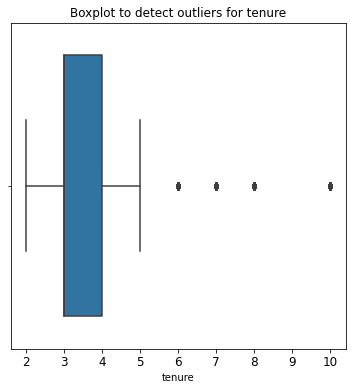

In [11]:
#check outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
#25th percentile in tenure
percentile25 = df1['tenure'].quantile(0.25)

#75th percentile value in tenure
percentile75 = df1['tenure'].quantile(0.75)

#interquartile range in tenure
iqr = percentile75 - percentile25

#define upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

#subset containing outliers in tenure
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("outliers`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
outliers`: 824


In [13]:
#number of peaople left vs stayed
print(df1['left'].value_counts())
#for percent
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


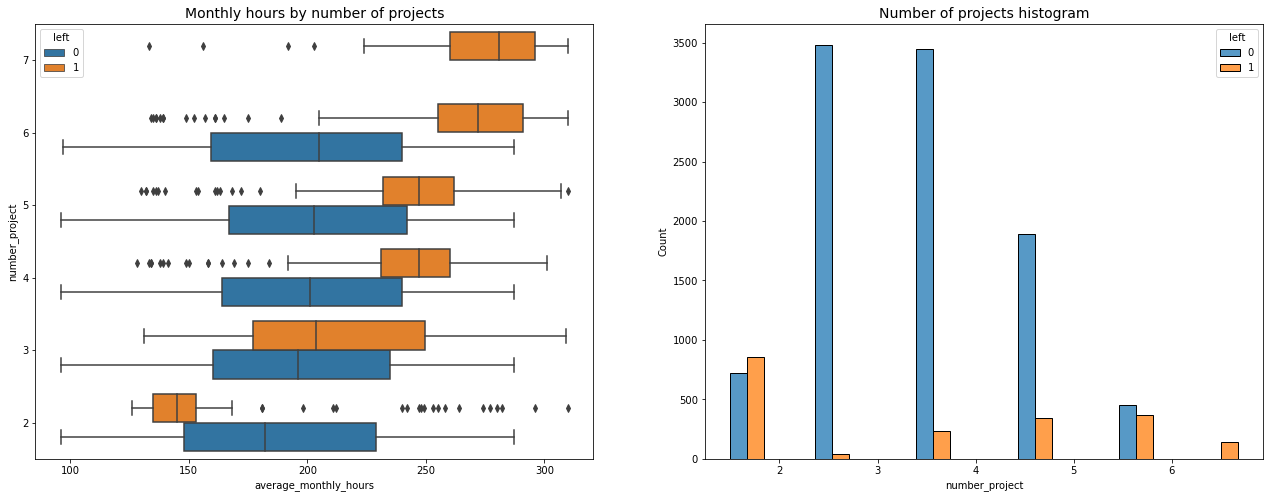

In [14]:
#Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

#ave monthly hours, number of projects over those left vs stayed, boxplot
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

#number of project for left vs stayed
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

In [15]:
df1[df1['number_project']==7]['left'].value_counts() #count for total number of stayed with 7 projects

1    145
Name: left, dtype: int64

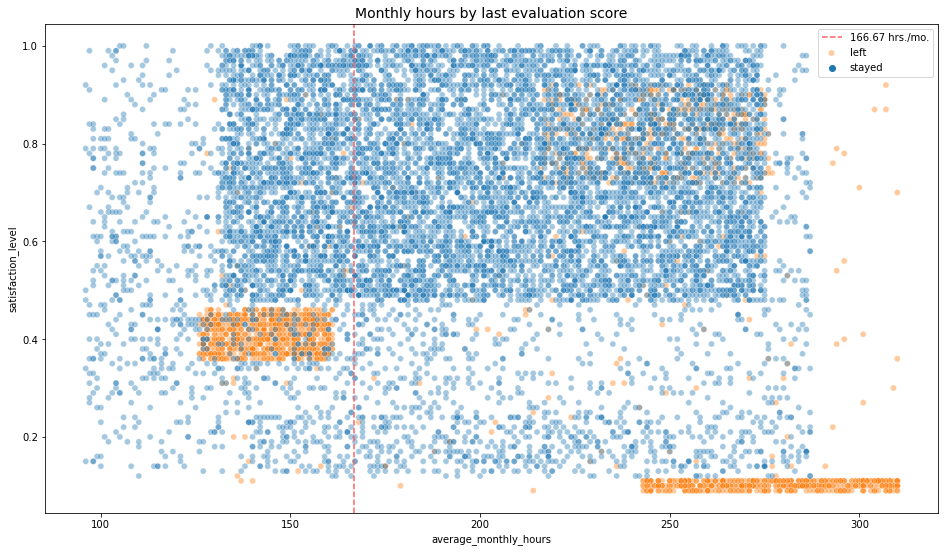

In [16]:
#scatterplot of ave monthly hours versus satisfaction level for those stayed and left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

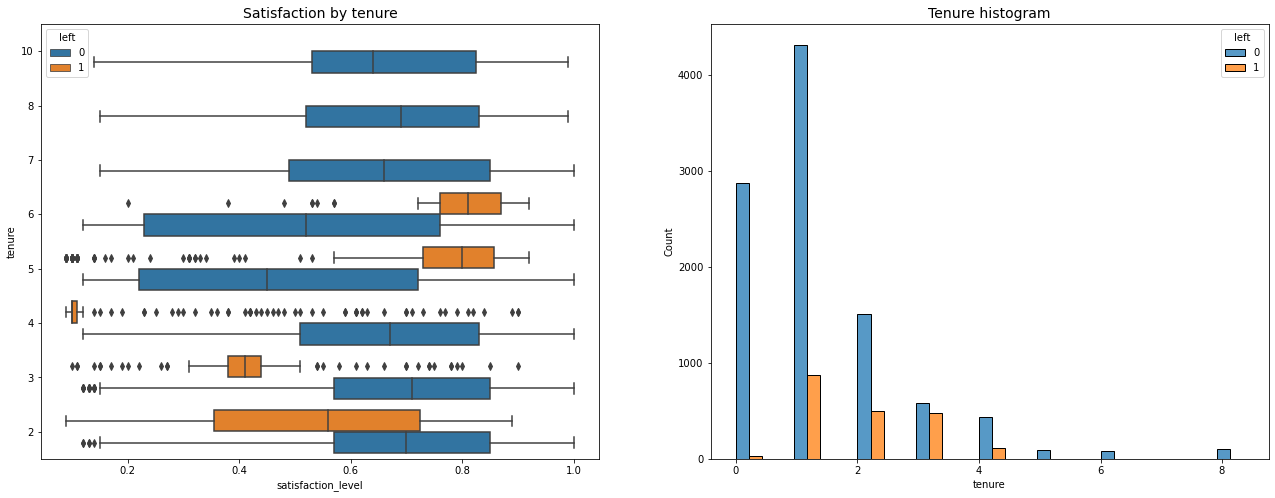

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

#distributions of satisfaction level by tenure for those stayed vs left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

#histogram distribution of tenure for those stayed vs left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

In [18]:
#mean and median satisfaction scores
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


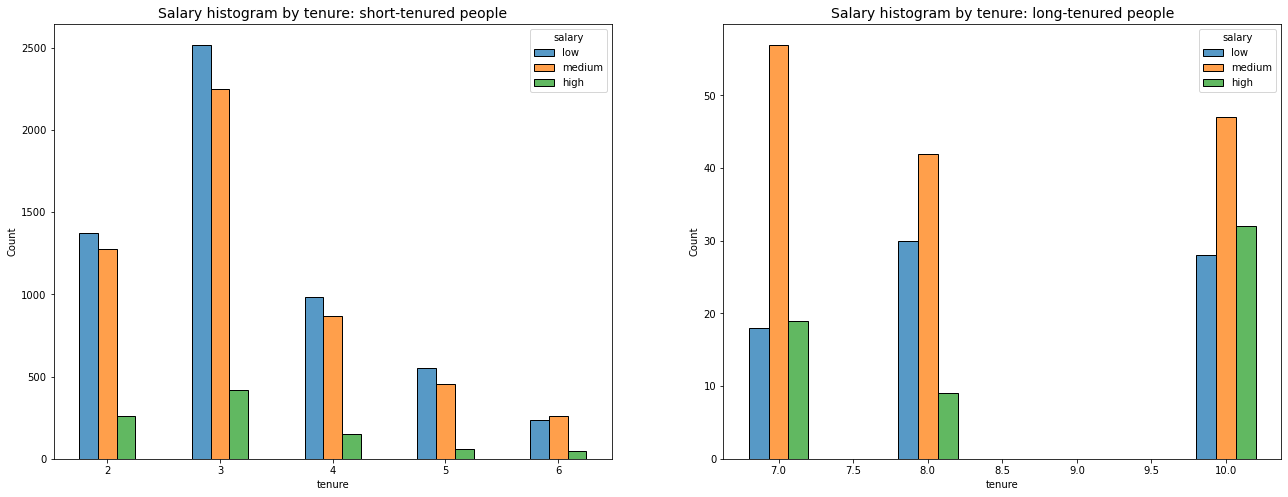

In [19]:
#set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

#short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

#long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

#short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

#long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

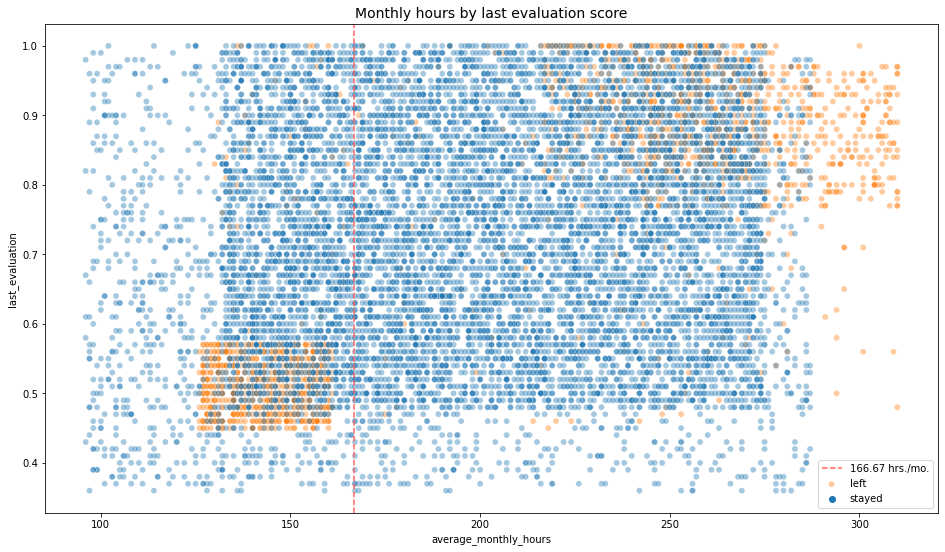

In [20]:
#scatterplot of ave  monthly hours versus last eval
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

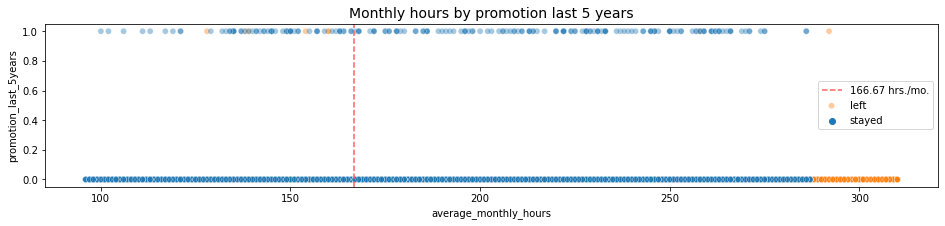

In [21]:
#ave monthly hours and promotion last 5yrs scatter
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

In [22]:
#counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

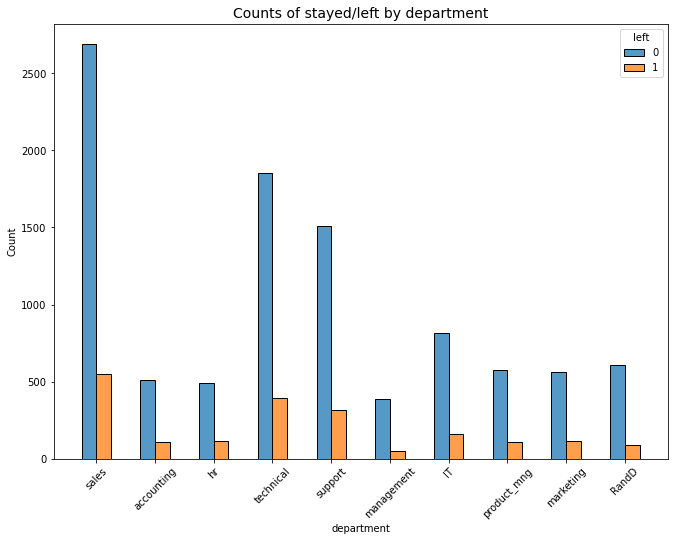

In [23]:
#stacked histogram department distribution of employees left vs stayed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

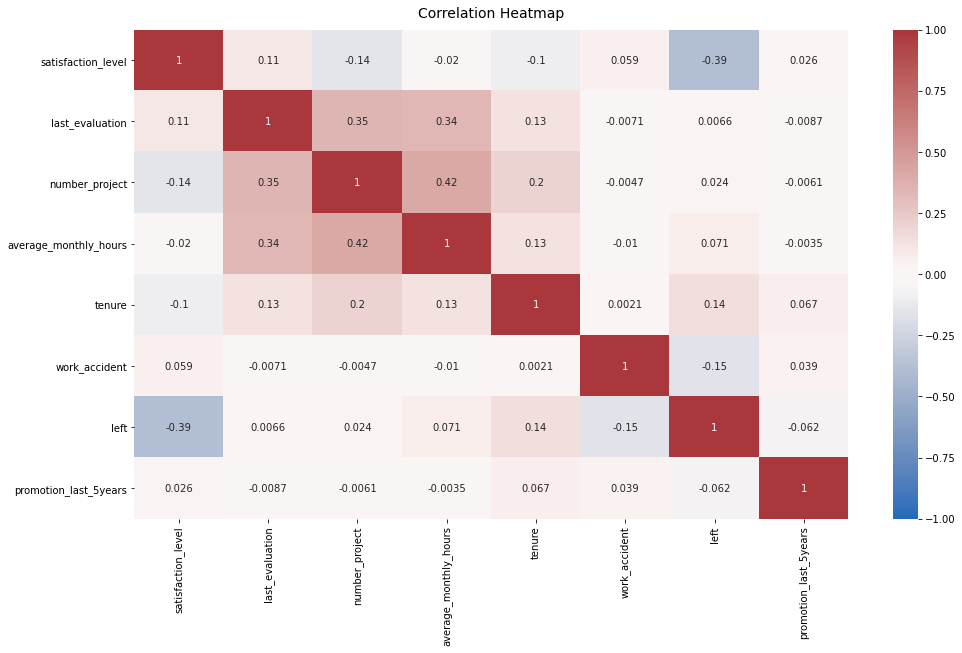

In [24]:
#correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

# logistic regression

In [154]:
#datafram copy
df_enc = df1.copy()
#salary column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
#dummy encode department column
df_enc = pd.get_dummies(df_enc, drop_first=False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [155]:
#isolate outcome variable
y = df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [156]:
#select features
X = df_enc.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [157]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# random forest proper

In [158]:
#rfmodel
rf = RandomForestClassifier(random_state=0)

#dictionary hyperparameters
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
#scoring metric
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#gridsearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [160]:
rf1.fit(X_train, y_train)

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'precision', 'recall', 'f1', 'roc_auc', 'accuracy'})

In [86]:
path = 'data/' #path where pickle file is saved

In [161]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [162]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [163]:
#write pickle
write_pickle(path, rf1, 'hr_rf1')

In [164]:
#read pickle
rf1 = read_pickle(path, 'hr_rf1')
rf1

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'precision', 'recall', 'f1', 'roc_auc', 'accuracy'})

In [165]:
#check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [166]:
#check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [94]:
def make_results(model_name:str, model_object, metric:str):
    '''
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, accuracy, or auc
    '''
    #metric dictionary that match cv
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    #Get all the results from the CV
    cv_results = pd.DataFrame(model_object.cv_results_)

    #Isolate the row of the df with max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    #Accuracy, precision, recall, and f1 score
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    #Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [95]:
#CVscores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


# feature engineering

In [126]:
#remove sat_level
df2 = df_enc.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [127]:
#add overworked column, same with ave in mean time
df2['overworked'] = df2['average_monthly_hours']
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [128]:
#define overworked as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [129]:
#remove monthly hours
df2 = df2.drop('average_monthly_hours', axis=1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [130]:
#isolate outcome variable
y2 = df2['left']
#select the features
X2 = df2.drop('left', axis=1)
#create data set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [131]:
#model
rf = RandomForestClassifier(random_state=0)

#dictionary CVparams
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

#scoringmetric
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#gridearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [132]:
%%time 
rf2.fit(X2_train, y2_train)

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\paolo\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.p

Wall time: 9min 46s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'precision', 'recall', 'f1', 'roc_auc', 'accuracy'})

In [133]:
#write prickle
write_pickle(path, rf2, 'hr_rf2')

In [134]:
#read
rf2 = read_pickle(path, 'hr_rf2')

In [135]:
#best score
print(rf2.best_params_)
print(rf2.best_score_)

{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
0.9648100662833985


In [136]:
#compare CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(rf1_cv_results)
print(rf2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [137]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    model_name (string): How you want your model to be named in the output table
    model: A fit GridSearchCV object
    X_test_data: numpy array of X_test data
    y_test_data: numpy array of y_test data
    '''
    preds = model.best_estimator_.predict(X_test_data)
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [170]:
#predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf2_test_scores = get_scores('random forest2 test', rf2, X2_test, y2_test)
print(rf1_test_scores)
print(rf2_test_scores)

                 model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439
                 model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407


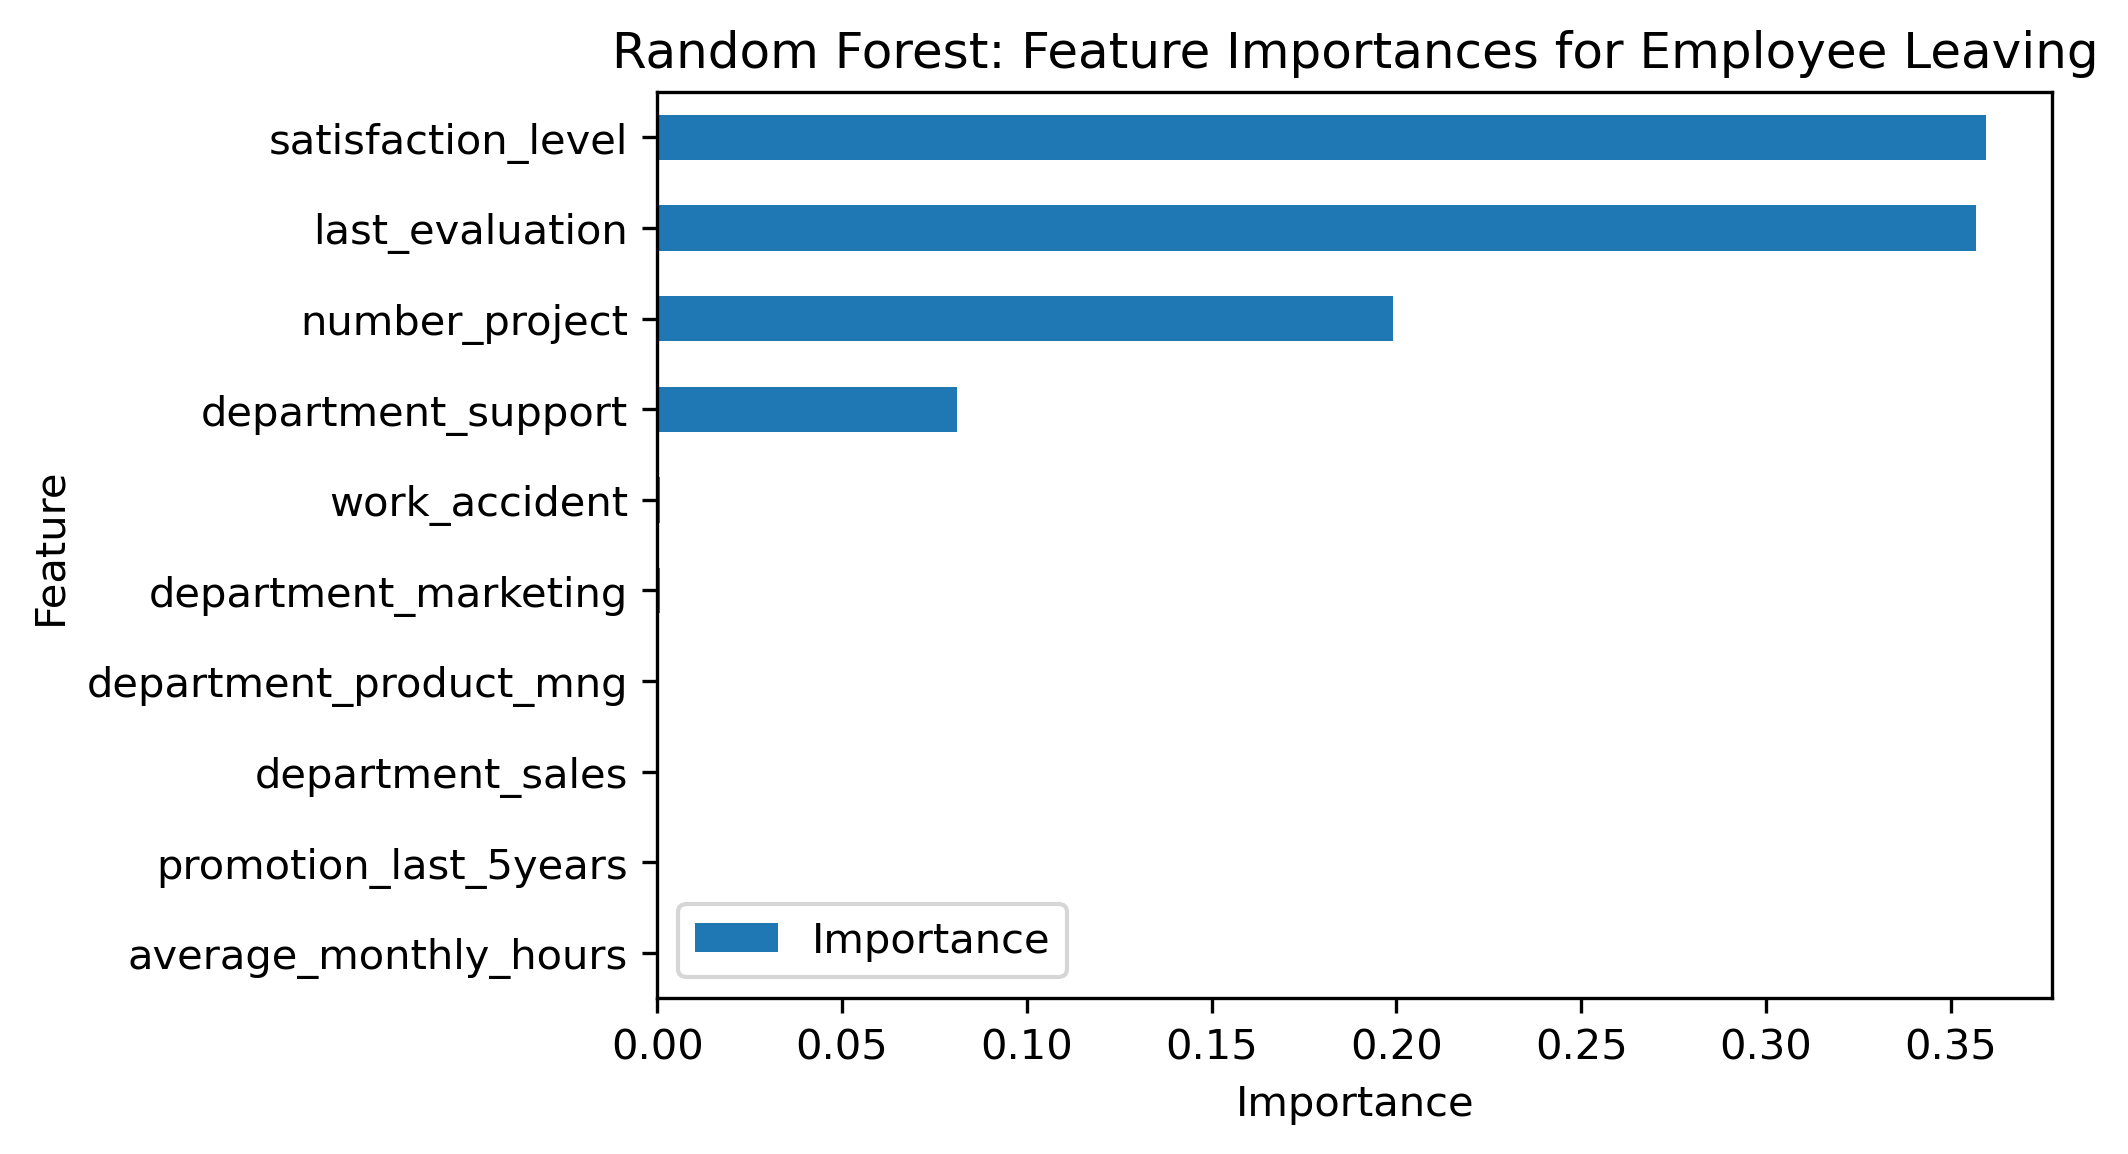

In [177]:
#feature importances
feat_impt = rf2.best_estimator_.feature_importances_

#indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

#column labels of top 10 features 
feat = X.columns[ind]

#filter to consist of top 10 feature importances
feat_impt = feat_impt[ind]
y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()